### Load data

In [1]:
import common
import pandas as pd
data_df, lects_df = common.load_lexirumah()
display(data_df.head())
display(lects_df.head())




Loading data...
Loaded data.


,ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment,Source
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10]
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10]
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10]
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10]
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10]


,ID,Name,Family,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment,Macroarea
0,abui1241-fuime,"Abui, Fuimelang",Timor-Alor-Pantar,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-petle,"Abui, Petleng",Timor-Alor-Pantar,-8.2144,124.593,"Kecamatan Teluk Mutiara, Kabupaten Alor, East ...",abui1241,abz,None,None,"[p/general, p/abui1241-petle]",None,Papunesia
2,abui1241-takal,"Abui, Takalelang",Timor-Alor-Pantar,-8.1887,124.6264,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,abui,None,"[p/general, p/abui1241-takal]",None,Papunesia
3,abui1241-ulaga,"Abui, Ulaga",Timor-Alor-Pantar,-8.403792,124.623702,"Kecamatan Alor Barat Daya, Kabupaten Alor, Eas...",abui1241,abz,None,None,"[p/general, p/abui1241-ulaga]",None,Papunesia
4,adan1251-lawah,"Adang, Lawahing",Timor-Alor-Pantar,-8.2109,124.4272,"Kecamatan Alor Barat Laut, Kabupaten Alor, Eas...",adan1251,adn,None,None,"[p/general, p/adan1251-lawah]",None,Papunesia


### Select and combine data

In [2]:
#lects_df = lects_df[["ID", "Name", "Family", "Region", "Latitude", "Longitude"]]
# Filter out proto-languages
lects_df = lects_df[~lects_df["Name"].str.startswith("proto-")]
lects_alorese = lects_df[lects_df["Name"].str.startswith("Alorese")]
# Four Western Lamaholot languages close to Alorese
#lects_lamaholot_related = lects_df[lects_df["Name"].str.contains(
#    "Lamalera|Lewotobi|Lewoingu|Lewolema", case=False, regex=True)]
lects_western_lamaholot = lects_df[lects_df["Iso"].isin(["adr", "lmr", "slp", "ila", "lwt"])]
# Flores-Lembata family, but with preceding WL varieties excluded (and Alorese excluded)
lects_flores_lembata = lects_df[(lects_df["ID"].str.startswith("lama") | lects_df["ID"].str.startswith("sika") | lects_df["ID"].str.startswith("keda")) & ~lects_df.index.isin(lects_western_lamaholot.index)]
# Timor-Alor-Pantar languages, but only Alor-Pantar languages, spoken adjacent to Alorese
lects_alor_pantar = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & lects_df["Region"].str.contains("Alor|Pantar", case=False, regex=True)]
# Other Timor-Alor-Pantor languages, spoken on Timor (and small island Kisar)
lects_timor = lects_df[lects_df["Family"].str.startswith("Timor-Alor-Pantar") & ~lects_df.index.isin(lects_alor_pantar.index)]
lects_selected_df = pd.concat([lects_alorese, lects_western_lamaholot, lects_flores_lembata, lects_alor_pantar, lects_timor])

# Join data with lect name from lects table
# This order (first select lects, then merge) fastest
data_langs_df = data_df[data_df["Lect_ID"].isin(lects_selected_df["ID"])]
data_langs_df = data_langs_df.rename(columns={"ID":"Form_ID"})
data_merged_df = data_langs_df.merge(lects_df, how="left", left_on="Lect_ID", right_on="ID")
data_merged_df = data_merged_df.drop("ID", axis=1)
display(data_merged_df.head())


,Form_ID,Lect_ID,Concept_ID,Form_according_to_Source,Form,Local_Orthography,Segments,Comment_x,Source,Name,...,Latitude,Longitude,Region,Glottocode,Iso,Culture,Description,Orthography,Comment_y,Macroarea
0,abui1241-fuime-sky-1,abui1241-fuime,sky,adi,adi,adi,"[a, d, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
1,abui1241-fuime-sun-1,abui1241-fuime,sun,wari,wari,wari,"[w, a, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
2,abui1241-fuime-moon-1,abui1241-fuime,moon,ije,ije,iye,"[i, j, e]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
3,abui1241-fuime-star-1,abui1241-fuime,star,fɪri,fɪri,firi,"[f, ɪ, r, i]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia
4,abui1241-fuime-night-1,abui1241-fuime,night,tuŋtama,tuŋtama,tungtama,"[t, u, ŋ, t, a, m, a]",None,[schapper10],"Abui, Fuimelang",...,-8.236,124.6783,"Kecamatan Perwakilan Alor Barat Laut, Kabupate...",abui1241,abz,None,None,"[p/general, p/abui1241-fuime]",None,Papunesia


### Compute phoneme distributions & compute feature matrix per language

In [3]:
#display(data_merged_df[data_merged_df["Lect_ID"]=="alor1247-baran"])
CHARACTER_SEGMENTATION = False
if CHARACTER_SEGMENTATION:
    # perform per-character segmentation
    data_merged_df["Segments_char"] = data_merged_df["Form"].apply(list) # lambda x : [el for el in x if el!="_"]
    segments_col = "Segments_char"
    display(data_merged_df[["Segments", "Segments_char"]].head(50))
else:
    # Use segmentation from dataset (clustering some combinations together)
    segments_col = "Segments"

data_grouped_lang = data_merged_df.groupby("Lect_ID")
data_agg = data_grouped_lang.aggregate({segments_col:list, "Name": "first", "Family": "first", "Latitude": "first", "Longitude":"first"})
# data_agg["phone_prob"] = data_agg[segments_col].apply(common.phone_prob)
# data_agg["biphone_prob"] = data_agg[segments_col].apply(common.biphone_prob)
# data_agg["phone_prob_existence"] = data_agg[segments_col].apply(common.phone_prob_existence)
# data_agg["biphone_prob_existence"] = data_agg[segments_col].apply(common.biphone_prob_existence)
# display(data_agg.head())

# Effect now is:
# -1 for available biphone,
# -None for combination not available, None for combination and both constitutents not available
# => None replaced by 0
# What Macklin-Cordes does:
# - 1 for available biphone
# - 0 for combination not available, if constituents are available
# - None for combination not available, if constituents not available
phone_prob_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob, "phone_prob")
phone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_existence, "phone_prob_existence")
biphone_prob_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob, "biphone_prob")
biphone_prob_existence_matrix = common.create_matrix(data_agg, segments_col, common.biphone_prob_existence, "biphone_prob_existence")

phone_prob_boundaries_matrix = common.create_matrix(data_agg, segments_col, common.phone_prob_boundaries, "phone_prob_boundaries")
biphone_transition_matrix = common.create_biphone_transition_matrix(biphone_prob_matrix, phone_prob_boundaries_matrix)

display(phone_prob_matrix.head())
display(phone_prob_existence_matrix.head())
display(biphone_prob_matrix.head())
display(biphone_prob_existence_matrix.head())
display(biphone_transition_matrix.head())


,ŋː,ɨ,oː,ts,ĩ,ɜ̃,f,ɲ,p,ə̃,...,rː,ɛː,n,ɤ,u̥,_,ɔ̘,pʰ,æ̘,d
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,NaN,NaN,NaN,NaN,NaN,NaN,0.0218905,NaN,0.0079602,NaN,...,NaN,NaN,0.0273632,NaN,NaN,0.0278607,NaN,NaN,NaN,0.0139303
abui1241-papun,NaN,NaN,0.00153218,NaN,NaN,NaN,NaN,NaN,0.00970378,NaN,...,NaN,NaN,0.0388151,NaN,NaN,0.0326864,NaN,NaN,NaN,0.0132789
abui1241-petle,NaN,NaN,0.00199203,NaN,NaN,NaN,0.0239044,NaN,0.0119522,NaN,...,NaN,NaN,0.0378486,NaN,NaN,0.0298805,NaN,NaN,NaN,0.00796813
abui1241-takal,NaN,NaN,0.00526946,NaN,0.000239521,NaN,0.0165269,0.000239521,0.0131737,NaN,...,NaN,NaN,0.0361677,NaN,NaN,0.0550898,NaN,NaN,NaN,0.0148503
abui1241-ulaga,NaN,NaN,0.012439,NaN,NaN,NaN,0.0156098,0.000243902,0.0131707,NaN,...,NaN,NaN,0.0429268,NaN,NaN,0.0536585,NaN,NaN,NaN,0.015122


,l,uː,n,i,ɹ,i,_,aː,e,ɛ,...,q,_,j,+,r,_,n,i,_,o
,uː,m,ĩ,bv,s,bː,ɔ,x,_,ŋ,...,aː,i̘,ɔ,ɔ,ə̃,v,o,f,ɛ̘,g
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,0.00042337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00084674,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.00127011,0.00127011,NaN,NaN
abui1241-papun,0.000866551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00303293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abui1241-petle,0.00164204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abui1241-takal,0.000416493,NaN,NaN,NaN,NaN,NaN,0.000208247,NaN,NaN,NaN,...,NaN,NaN,0.00249896,NaN,NaN,NaN,NaN,0.00062474,NaN,NaN
abui1241-ulaga,0.000417624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0035498,NaN,...,NaN,NaN,NaN,NaN,NaN,0.00187931,0.000835247,0.000417624,NaN,NaN


,ŋː,ɨ,oː,ts,ĩ,ɜ̃,f,ɲ,p,ə̃,...,rː,ɛː,n,ɤ,u̥,_,ɔ̘,pʰ,æ̘,d
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1,NaN,...,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1
abui1241-papun,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1
abui1241-petle,NaN,NaN,1,NaN,NaN,NaN,1,NaN,1,NaN,...,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1
abui1241-takal,NaN,NaN,1,NaN,1,NaN,1,1,1,NaN,...,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1
abui1241-ulaga,NaN,NaN,1,NaN,NaN,NaN,1,1,1,NaN,...,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,1


,l,uː,n,i,ɹ,i,_,aː,e,ɛ,...,q,_,j,+,r,_,n,i,_,o
,uː,m,ĩ,bv,s,bː,ɔ,x,_,ŋ,...,aː,i̘,ɔ,ɔ,ə̃,v,o,f,ɛ̘,g
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN
abui1241-papun,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abui1241-petle,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abui1241-takal,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,1,NaN,NaN,NaN,NaN,1,NaN,NaN
abui1241-ulaga,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN


,l,uː,n,i,ɹ,i,_,aː,e,ɛ,...,🔙q,🔙_,🔙j,🔙+,🔙r,🔙_,🔙n,🔙i,🔙_,🔙o
,uː,m,ĩ,bv,s,bː,ɔ,x,_,ŋ,...,🔙aː,🔙i̘,🔙ɔ,🔙ɔ,🔙ə̃,🔙v,🔙o,🔙f,🔙ɛ̘,🔙g
Lect_ID,,,,,,,,,,,,,,,,,,,,,
abui1241-fuime,0.0122237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0153203,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0485504,0.0783427,NaN,NaN
abui1241-papun,0.0333811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.107487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abui1241-petle,0.0273418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abui1241-takal,0.0100944,NaN,NaN,NaN,NaN,NaN,0.00491552,NaN,NaN,NaN,...,NaN,NaN,0.117973,NaN,NaN,NaN,NaN,0.0491552,NaN,NaN
abui1241-ulaga,0.0111597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0736584,NaN,...,NaN,NaN,NaN,NaN,NaN,0.20186,0.038129,0.035746,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
teiw1235-adiab,0.0136224,0.16736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.234304,NaN,NaN,NaN,NaN,NaN,0.0571474,0.31541,NaN,0.0732201
teiw1235-nule,0.0332341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0845959,NaN,NaN,NaN,NaN,NaN,0.109049,0.16044,NaN,0.0401101


### Perform dimensionality reduction

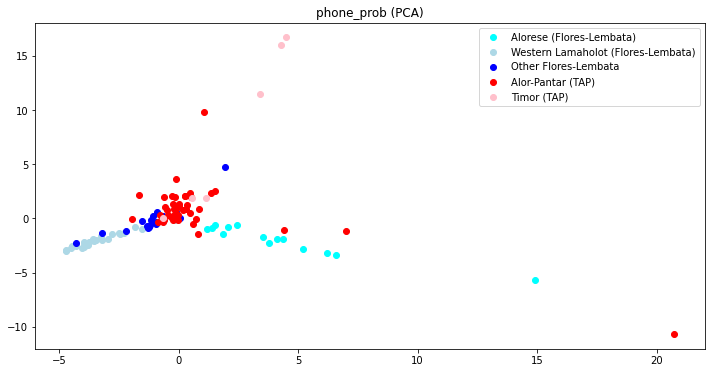

Loadings positive x:


kː    0.231727
nː    0.229743
tː    0.229180
bː    0.228419
mː    0.224324
pː    0.216608
lː    0.210351
dː    0.201428
gː    0.179173
sː    0.164911
Name: PC1, dtype: float64

Loadings negative x:


o     -0.155826
ã    -0.145686
ə     -0.142888
õ    -0.140334
ũ    -0.136783
ẽ    -0.123282
ĩ    -0.110461
ãː   -0.099997
e     -0.096619
ũː   -0.096095
Name: PC1, dtype: float64

Loadings positive y:


tʰ    0.216343
kʰ    0.214205
pʰ    0.213825
z     0.202750
lˑ    0.200249
k̚    0.200249
aˑ    0.200249
iˑ    0.200249
ts    0.184010
tʃ    0.183000
Name: PC2, dtype: float64

Loadings negative y:


p    -0.147324
kː   -0.122875
e    -0.122514
bː   -0.121540
nː   -0.118896
pː   -0.116329
tː   -0.115700
lː   -0.114253
mː   -0.112910
a    -0.110897
Name: PC2, dtype: float64

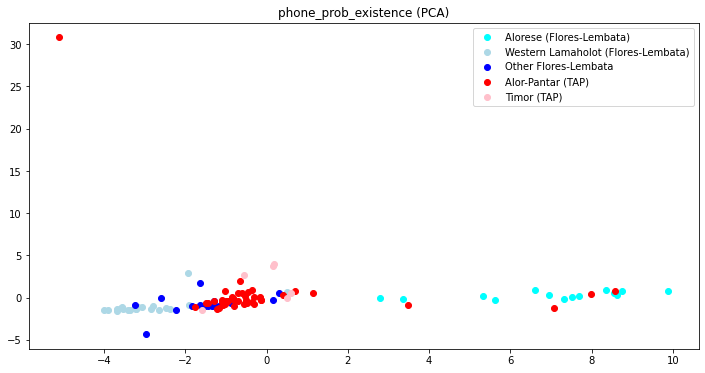

Loadings positive x:


nː    0.261316
bː    0.260438
pː    0.256570
kː    0.255466
rː    0.252140
lː    0.249344
mː    0.247299
dː    0.242461
tː    0.242013
gː    0.190871
Name: PC1, dtype: float64

Loadings negative x:


õ    -0.135218
ẽ    -0.130242
ã    -0.113607
ɲ     -0.102439
oː    -0.100256
ũ    -0.097368
ãː   -0.097266
ə̃    -0.081075
ĩ    -0.075816
ũː   -0.072321
Name: PC1, dtype: float64

Loadings positive y:


ɪ̈     0.289685
e̞     0.289685
aː̈    0.289685
ä     0.289685
ɘ      0.289685
e̞ː    0.289685
ɞ      0.289685
ɐ      0.289685
ü     0.289685
tʰ     0.176848
Name: PC2, dtype: float64

Loadings negative y:


õ    -0.051548
ẽ    -0.047826
ũ    -0.044118
ɔ̘    -0.040421
æ̘    -0.040421
a̘    -0.040421
i̘    -0.040421
u̘    -0.040421
ɛ̘    -0.040421
ãː   -0.039437
Name: PC2, dtype: float64

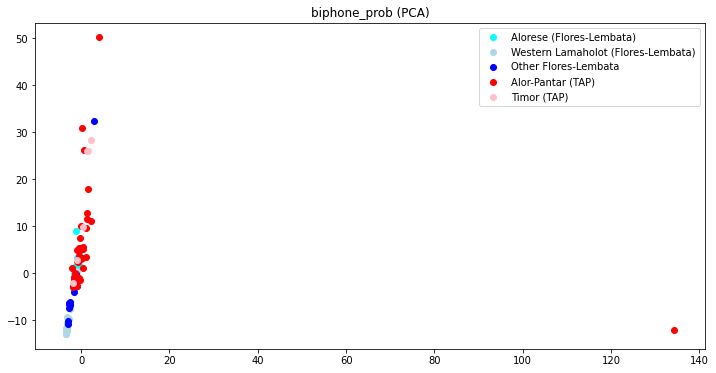

Loadings positive x:


e̞   ŋ      0.074489
aː̈  n      0.074489
l    j      0.074489
ŋ    ä     0.074489
ä   s      0.074489
aː̈  ŋ      0.074489
e̞   d      0.074489
f    aː̈    0.074489
e̞   r      0.074489
     b      0.074489
Name: PC1, dtype: float64

Loadings negative x:


r  a   -0.021401
m  a   -0.021196
a  t   -0.020599
   🡆   -0.018866
b  a   -0.018603
l  e   -0.018025
n  a   -0.017460
m  e   -0.016605
e  🡆   -0.016509
b  e   -0.016431
Name: PC1, dtype: float64

Loadings positive y:


ɛ  s     0.064024
   g     0.061328
   n     0.060899
   l     0.060729
m  ɛ     0.060006
b  ɛ     0.059237
t  ɛ     0.059185
ɛ  b     0.056329
ɑ  k     0.055835
g  iː    0.055292
Name: PC2, dtype: float64

Loadings negative y:


e  🡆   -0.057103
p  e   -0.056801
o  🡆   -0.054383
p  i   -0.053871
🡄  p   -0.053019
m  e   -0.052891
b  e   -0.052798
   ə   -0.052215
ŋ  e   -0.050533
e  l   -0.050412
Name: PC2, dtype: float64

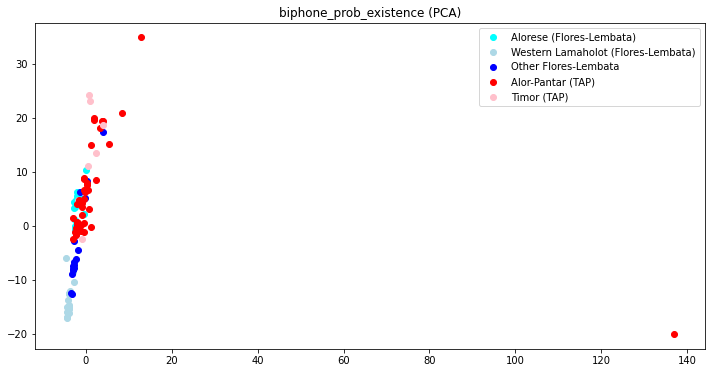

Loadings positive x:


l   aː̈    0.071078
i   ä     0.071078
iː  q      0.071078
ä  ä     0.071078
i   e̞     0.071078
ɞ   ɪ      0.071078
ʋ   ä     0.071078
l   j      0.071078
ɐ   t      0.071078
e̞  m      0.071078
Name: PC1, dtype: float64

Loadings negative x:


🡄  a   -0.071078
a  r   -0.071078
   n   -0.053655
m  a   -0.053655
a  l   -0.047889
k  a   -0.047889
t  a   -0.047889
l  a   -0.045669
a  m   -0.043111
r  a   -0.043111
Name: PC1, dtype: float64

Loadings positive y:


r  ɛ    0.059928
t  ɛ    0.058945
ɛ  l    0.058579
_  s    0.058240
b  ɛ    0.057925
n  ɛ    0.057786
l  ɛ    0.056676
ɛ  k    0.055673
   t    0.055649
   🡆    0.055458
Name: PC2, dtype: float64

Loadings negative y:


l   ã   -0.061977
ã  🡆    -0.060674
n   ã   -0.059728
r   õ   -0.059584
õ  🡆    -0.058831
k   ã   -0.058394
ŋ   e    -0.057697
w   ã   -0.057571
r   ã   -0.057392
ʔ   ã   -0.056751
Name: PC2, dtype: float64

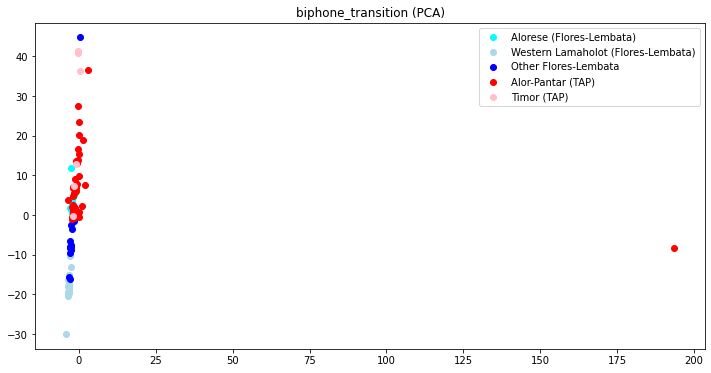

Loadings positive x:


e̞    t       0.052158
🔙ä   🔙k      0.052158
k     aː̈     0.052158
🔙r    🔙e̞     0.052158
j     e̞      0.052158
🔙ä   🔙j      0.052158
🔙m    🔙e̞     0.052158
🔙n    🔙aː̈    0.052158
🔙aː̈  🔙q      0.052158
🔙l    🔙aː̈    0.052158
Name: PC1, dtype: float64

Loadings negative x:


🔙m  🔙a   -0.020702
m   a    -0.015434
🔙l  🔙a   -0.015111
b   a    -0.014783
r   a    -0.014770
🔙a  🔙t   -0.014650
n   a    -0.014335
🔙t  🔙a   -0.013916
🔙r  🔙a   -0.013677
a   m    -0.013409
Name: PC1, dtype: float64

Loadings positive y:


🔙ɛ  🔙n    0.049537
    🔙l    0.046331
t   ɛ     0.045418
🔙ɛ  🔙k    0.044076
🔙ɔ  🔙k    0.043953
🔙l  🔙🡆    0.043711
l   🡆     0.043678
🔙ɔ  🔙l    0.043407
m   ɛ     0.042655
n   _     0.042539
Name: PC2, dtype: float64

Loadings negative y:


🔙e  🔙🡆   -0.046274
õ  🡆    -0.045774
l   o    -0.045600
a   o    -0.045501
🔙e  🔙l   -0.045483
🔙ŋ  🔙e   -0.045311
🔙ə  🔙r   -0.045259
🔙p  🔙i   -0.045224
ã  🡆    -0.045177
🔙o  🔙🡆   -0.045135
Name: PC2, dtype: float64

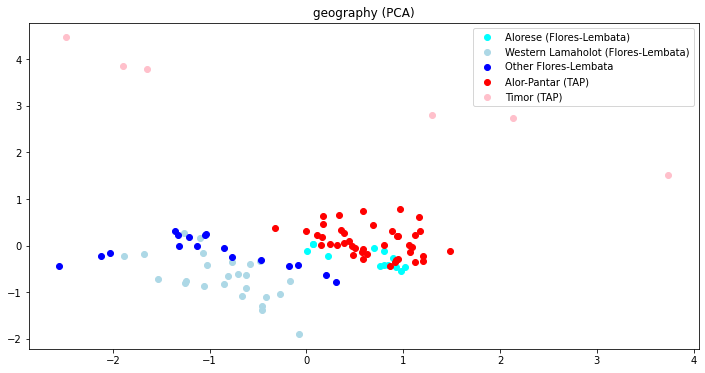

Loadings positive x:


Latitude     0.707107
Longitude    0.707107
Name: PC1, dtype: float64

Loadings negative x:


Longitude    0.707107
Latitude     0.707107
Name: PC1, dtype: float64

Loadings positive y:


Longitude    0.707107
Latitude    -0.707107
Name: PC2, dtype: float64

Loadings negative y:


Latitude    -0.707107
Longitude    0.707107
Name: PC2, dtype: float64

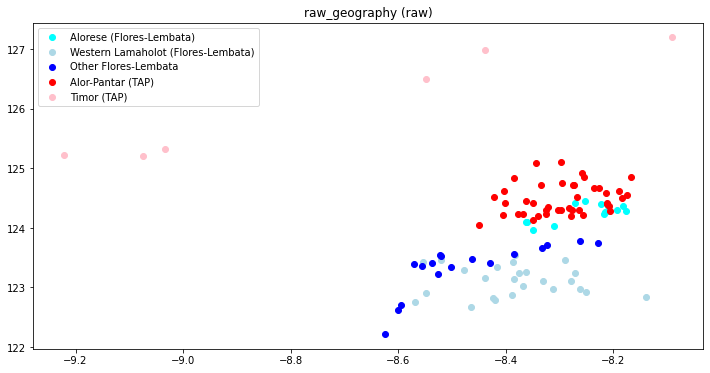

In [4]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS

PLOT_LABELS = False

# TODO: Biphone prob with transition probabilities

# Define language groups for plots
language_groups = {"Alorese (Flores-Lembata)": {"color": "cyan", "lects": lects_alorese["ID"]},
                   "Western Lamaholot (Flores-Lembata)": {"color": "lightblue", "lects": lects_western_lamaholot["ID"]},
                   "Other Flores-Lembata": {"color": "blue", "lects": lects_flores_lembata["ID"]},
                   "Alor-Pantar (TAP)": {"color": "red", "lects": lects_alor_pantar["ID"]},
                   "Timor (TAP)": {"color": "pink", "lects": lects_timor["ID"]}
                  }

dim_reds_available = {"PCA": PCA(n_components=2)}#,"MDS": MDS()}

analyses = {"phone_prob": phone_prob_matrix,
            "phone_prob_existence": phone_prob_existence_matrix,
            "biphone_prob": biphone_prob_matrix,
            "biphone_prob_existence": biphone_prob_existence_matrix,
            "biphone_transition": biphone_transition_matrix,
            "geography": data_agg[["Latitude", "Longitude"]].fillna(0),
            "raw_geography": ["Latitude", "Longitude"],
            }

for study_label, study_data in analyses.items():
    if study_label == "raw_geography":
        reduce = False
        plot_cols = study_data
        dim_reds = {"raw": plot_cols}
    else:
        reduce = True
        dim_reds = dim_reds_available
    for dr_label, dr in dim_reds.items():
        common.reduce_plot(study_label, study_data, dr_label, dr, data_agg, language_groups, PLOT_LABELS, reduce)
        if dr_label == "PCA":
            loadings_x_pos, loadings_x_neg, loadings_y_pos, loadings_y_neg = common.compute_loadings(dr, study_data.columns)
            print("Loadings positive x:")
            display(loadings_x_pos)
            print("Loadings negative x:")
            display(loadings_x_neg)
            print("Loadings positive y:")
            display(loadings_y_pos)
            print("Loadings negative y:")
            display(loadings_y_neg)
        